# Set up

In [2]:
# install.packages("corrplot")
# install.packages("car")
library(car)
library(corrplot)

Loading required package: carData


# Abstract

[To be written]
Your team has been hired to provide research for a political campaign. They have obtained a
dataset of crime statistics for a selection of counties in North Carolina. Your task is to examine the data to help the campaign understand the determinants of crime and to generate policy suggestions that are applicable to local government.

The great state of North Carolina and its 100 counties make for a diverse place, with both urban and rural, richer and poorer areas.

# Research question and introduction

This project aims to determine whether economic prosperity helps in reducing crime. It is commonly known that crime tends to correlate with factors such as higher population density and urban areas; however, there has been less research on the effect of wages on an area's crime rate.

Therefore, we summarize our research question as: **Whether economic prosperity helps in reducing crime?**

Based on the results of this analysis, we aim to recommend whether our political compaign should advocate for additional policy changes based on economic prosperity to reduce crime or whether efforts at reducing crime should be placed elsewhere. Note that whether or not economic prosperity has an effect on crime, it continues to be a worthy goal with many potential positive effects in other parts of our constituents lives; additional research will be required to determine the effects on other aspects of quality-of-life.

# Methodology and EDA

We use data from a study by Cornwell and Trumball, researchers from the University of Georgia and West Virginia University (C. Cornwell and W. Trumball (1994), “Estimating the Economic Model of Crime with Panel Data,” Review of Economics and Statistics 76, 360-366.)


We initially look at data provided and how variables correlate the the crime rate `crmrte` that we aim to regress in subsequent models. As seen in below code, we first clean data for empty rows and then run a correlation matrix plot. While examining the raw data, we found an outlier in the `wser` column that was likely the result of a typo. However, instead of assuming and correcting the typo, we decided to remove the column altogether.

,county,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
county,1.000000000,0.030993962,-0.007869345,0.04997904,-0.08006349,0.035455729,0.07594689,-0.02088583,-0.07964456,0.04608552,...,0.04755654,0.034499005,0.056646137,-0.03475422,-0.03257513,0.007916282,0.104314430,0.086028111,-0.04943311,0.1067429616
crmrte,0.030993962,1.000000000,-0.407623882,-0.38473463,0.05284061,0.007397583,0.16489157,0.72752293,0.45764632,-0.36075891,...,0.21848797,0.399695742,0.319846877,0.33934326,0.34555592,0.478998138,0.206759646,0.345631303,-0.14547059,0.2861219778
prbarr,-0.007869345,-0.407623882,1.000000000,-0.06273036,0.04890118,0.170427379,0.42429096,-0.30873609,-0.13372036,0.16279684,...,-0.08133764,-0.113801660,-0.184246256,-0.26520980,-0.16144243,-0.219066664,-0.159906864,-0.031031210,0.40864552,-0.1860572774
prbconv,0.049979038,-0.384734631,-0.062730355,1.00000000,0.03061914,0.061686799,-0.01888089,-0.28783871,-0.28772471,0.02692483,...,0.02679865,-0.108877118,0.072553190,-0.02695754,0.08247112,0.039291293,-0.119735002,0.043601568,-0.32077804,-0.2192885025
prbpris,-0.080063488,0.052840613,0.048901181,0.03061914,1.00000000,-0.090575458,0.04948109,0.07993392,-0.09442389,-0.03835748,...,0.13130302,0.147406941,0.039164593,-0.01530258,0.01317109,0.090882157,-0.033034011,0.084865920,0.12126788,-0.0807174519
avgsen,0.035455729,0.007397583,0.170427379,0.06168680,-0.09057546,1.000000000,0.48909884,0.06786396,0.10119618,0.07452450,...,0.20088617,0.060231112,0.148431388,0.02021129,0.10102394,0.129416107,0.139397093,0.118029102,-0.15607021,0.0648944912
polpc,0.075946890,0.164891574,0.424290956,-0.01888089,0.04948109,0.489098842,1.00000000,0.15800501,0.28522394,0.13574369,...,0.16198387,0.105900975,0.185068357,0.15763065,0.26880884,0.154411662,0.052812876,0.373695122,0.02022667,0.0485075415
density,-0.020885831,0.727522933,-0.308736095,-0.28783871,0.07993392,0.067863961,0.15800501,1.00000000,0.32475128,-0.14639207,...,0.32356479,0.574490460,0.537307678,0.54077566,0.43657163,0.582859424,0.224854569,0.447608510,-0.14435935,0.1121432311
taxpc,-0.079644561,0.457646315,-0.133720364,-0.28772471,-0.09442389,0.101196179,0.28522394,0.32475128,1.00000000,-0.19371143,...,0.16626999,0.171628965,0.126957956,0.24949887,0.26520293,0.061179086,-0.031663393,0.208103114,-0.03947445,-0.0879942691
west,0.046085516,-0.360758914,0.162796838,0.02692483,-0.03835748,0.074524501,0.13574369,-0.14639207,-0.19371143,1.00000000,...,0.09267657,-0.138458121,-0.030460319,0.01385863,-0.01906047,-0.175136704,-0.082556533,-0.091084435,-0.01849811,-0.0488957446


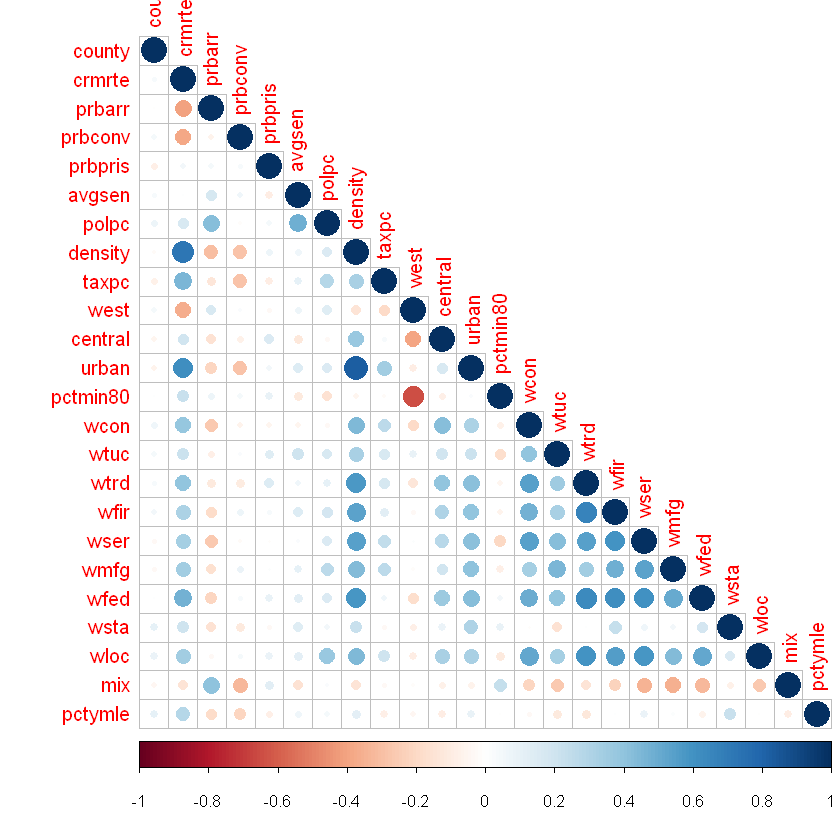

In [123]:
data <- read.table("crime_v2.csv", header=TRUE, sep=",")
data <- na.omit(data, cols="county")  # Remove empty rows read into bottom of table
data <- data[(data$wser<1000),]
data$prbconv <- as.numeric(data$prbconv)  # Convert factor column to numeric
data = subset(data, select=-c(year))  # Drop column column with only 1 unique value
# sapply(data, class)  # Double check data types


correlations <- cor(data)
correlations

corrplot(correlations, type="lower", method='circle')


As seen in the correlation matrix above, the following variables are most correlated wiht crime rate: 
* wage related variables: `wcon`, `wtuc`, `wtrd`, `wfir`, `wser`, `wmfg`, `wfed`, `wsta`, `wloc`
* population density variables
* police presence and conviction variables


We aim to regress crime rate, `crmrte`, to wage related variables acting as a proxy for economic prosperity (`wcon`, `wtuc`, `wtrd`, `wfir`, `wser`, `wmfg`, `wfed`, `wsta`, `wloc`). Each of the variables indicates the average weekly wage for employees in a particular industry. 

Our first model only looks at crime rate regressed on the wage related variables. However, as this does not take into account of important latent variables that also have a strong impact on crime (e.g., population density, police presence), we build a second model with both wage variables and key co-variates included. This way, we are able to isolate the effect of wages on crime without the interference of some of the key latent variables.

Lastly, we create a larger model with all of the main variables included to further isolate the effect of wages on crime. After each model, we will discuss the potential effects of omitted latent variables that we either have not yet included into the model or do not have data for.

Note that for our non-wage-related variables, we transform them (e.g., log, sqrt) as necessary to optimize the strength of their relationship with crime rate. Even though, it reduces the explainability of the non-wage-related variables, our key focus is on the effect of wages on crime anyway. By controlling as much as possible for the effect of other variables (by optimally transforming them to have a strong linear relationship with crime rate), we can focus more on the incremental impact of wages on crime. In other words, we are controlling for otherwise omitted latent relationships (e.g., non-linear) from other variables that may be affecting our wage variables.

While the wage related variables may also have non-linear relationships, we do not transform these to maximize interpretability of our models.

# [To be deleted] Brainstorm on omitted variables

Omitted variables that may have a big effect:
* GDP (per-capita growth)
* Drug use and addiction
* Strength of education system (pct with college degrees)
* Strength of education system (special ed)
* Strength of education system (K-12)
* Households with single parent
* Housing prices
* Employment rate
* Religion (pct people identifying as religious/spiritual)
* Physical environment (natural disasters rate / temperature / weather)
* Government funding for social welfare
* Population growth
* Job growth
* Cost of living

# [Change summary command to only call specific variables] Model 1 

Our first model regresses crime rate on the average weekly wage of different industries. We see that these variables are able to explain about 24.7% of the variability in the crime rate (based on adjusted R2). 

`wtrd`, the wage of the retail industry, has the largest coefficient of 0.0001153, indicating that every \$1000 increase in weekly retail wages could be associated with an 0.11 increase in average crimes per person. On the other hand, `wfir`, the weekly wage of the finance / insurance / real estate industries, has the most negative coefficient of -0.0000653, indicating that every \$1000 increase in weekly finance / insurance / real estate wages could be associated with a 0.07 decrease in average crimes per person. However, rather than jumping to conclusions on the effect of wages to crime, we realize that this initial baseline model has many different omitted latent variables that could be affecting the results of our analysis. 

Some of the major omitted variables that we believe could have a significant impact on crime rates include the population density and the police presence within an area. 

Population density is most likely positively correlated with both crime rate as well as wages (as wages tend to be higher in cities, which have higher population densities); we also see this in the calculated correlation. Because the omitted population density variable is positively correlated with both our endogenous and included exogenous variables, it is likely artificially increasing the modeled effect of the included exogenous variables. Said another way, because positive effect of population density on crime is not included, it is partially included in the wage variables, causing the coefficients/effect of the wage variables on crime to be more positive than they may be in reality.



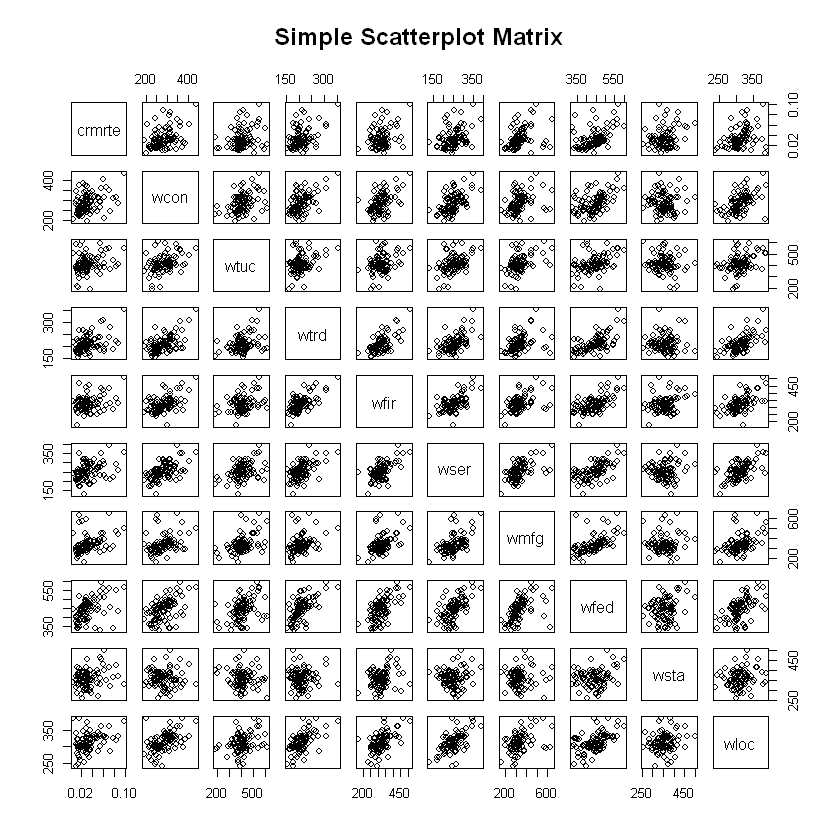

In [136]:
pairs(~crmrte + wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc,data=data,
   main="Simple Scatterplot Matrix")

In [124]:
model = lm(crmrte ~ wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc, data=data)
model_summary = summary(model)
paste('Adjusted R-Squared is', model_summary$adj.r.squared)
model_summary

[1] "Adjusted R-Squared is 0.233537604132852"


Call:
lm(formula = crmrte ~ wcon + wtuc + wtrd + wfir + wser + wmfg + 
    wfed + wsta + wloc, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.034999 -0.009483 -0.003980  0.006028  0.052221 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -6.743e-02  2.396e-02  -2.815  0.00615 **
wcon         7.378e-05  4.868e-05   1.516  0.13355   
wtuc        -2.790e-06  2.753e-05  -0.101  0.91954   
wtrd         1.155e-04  8.243e-05   1.402  0.16492   
wfir        -6.419e-05  5.112e-05  -1.256  0.21288   
wser        -1.270e-05  5.922e-05  -0.215  0.83070   
wmfg         3.674e-05  2.610e-05   1.408  0.16300   
wfed         8.209e-05  4.475e-05   1.834  0.07032 . 
wsta         8.348e-05  4.519e-05   1.847  0.06841 . 
wloc         6.292e-06  8.646e-05   0.073  0.94217   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01643 on 80 degrees of freedom
Multiple R-squared:  0.311,	Adjusted R-squ

With the above wage variables, we see that the Adjusted R-square is significant at 0.247. Which indicates that the wages wages do have fairly siginificant correlation with crime rates. 

However, as discussed earlier, we should also note that there are large number of omitted variables that may be causing residuals to increase. Because of these omitted variables, we have to believe that the wage coefficientrs are artifiically increased overall.

Some of the omitted variables in model 1, can be included in subsequent 2nd and 3rd models. However, some omitted variables may not be present in the dataset, which we list out as follows: 

Omitted variables that may have a big effect:
* GDP (per-capita growth)
* Drug use and addiction
* Strength of education system (pct with college degrees)
* Strength of education system (special ed)
* Strength of education system (K-12)
* Households with single parent
* Housing prices
* Employment rate
* Religion (pct people identifying as religious/spiritual)
* Physical environment (natural disasters rate / temperature / weather)
* Government funding for social welfare
* Population growth
* Job growth
* Cost of living

Having said this, we now turn attention to creating 2nd model with the following variables: 
* `taxpc`
* `polpc`
* `density`
* `pctymle`
* `prbarr`

Therefore: `Model 2 = Model 1 + taxpc, density, pctymle, polpc, prbarr`


Lastly, we will turn to the following remaining variables to create a "tertiary" model: 
* `pctmin80`
* `prbconv`
* `prbpris`
* `avgsen`
* `west`
* `central`

And hence, finally: 
`Model 3 = Model 2 + pctmin80, prbconv, prbpris, avgsen, west, central`

We've chosen to exclude the following columns:
* `urban`
* `county`
* `mix`

We exclude `urban` because it is defined as basically a calculated variable from `density` (based on the definition given in Cornwell & Trumball). We exclude county because it is an identifier column and not a characteristic. And lastly, we exclude `mix` because it is a descriptor of types of crime and thus not a possible causal variable of crime itself.

Before we turn our attention to remaining (secondary and tertiary) variables, we create a correlation matrix of those remaining variables (linear and transformed) with crime rate. That will help us assess whether to use the original linear variables in our subsequent models or to use the corresponding transformed variables. 

In [104]:
linear = cor(data.frame(data, data$crmrte))[,25]
logarithm = cor(data.frame(log(data), data$crmrte))[,25]
square_root = cor(data.frame(sqrt(data), data$crmrte))[,25]
square = cor(data.frame(data^2, data$crmrte))[,25]

df1 = data.frame(linear, logarithm, square_root, square)
df1[c(3:13, 23:24),]


,linear,logarithm,square_root,square
prbarr,-0.407623882,-0.43603457,-0.42891421,-0.33018870
prbconv,-0.384734631,-0.30796639,-0.35764853,-0.40294654
prbpris,0.052840613,0.09037005,0.07152836,0.01825894
avgsen,0.007397583,0.05419136,0.03161315,-0.04259903
polpc,0.164891574,0.38662275,0.28644420,-0.03142815
density,0.727522933,0.47403654,0.73040522,0.66086033
taxpc,0.457646315,0.42502877,0.44568208,0.44584684
west,-0.360758914,NaN,-0.36075891,-0.36075891
central,0.190233555,NaN,0.19023356,0.19023356
urban,0.616765513,NaN,0.61676551,0.61676551


From the above correlation matrix, we can see that `taxpc` is most correlated with `crime rate` linearly (correlation with `crime rate` goes down when transformed). However, `polpc`, `pctymle`, and `prbarr` show slight improvements in correlations when transformed to their logarithms, while the same is true for `density` when transformed to its square root. 


Therefore we revise the definition of our 2nd model as follows: 
`Model 2 = Model 1 + taxpc, sqrt(density), log(pctymle), log(polpc), log(prbarr)`

# Model 2: Density and police variables (secondary variables) 

First we will start out by creating a model where every variable is as-is.

In [127]:
secondary_model = lm(crmrte ~ wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc + taxpc + density + pctymle + 
                     polpc + prbarr, data=data)
secondary_model_summary = summary(secondary_model)
c('Adjusted R-Squared is', secondary_model_summary$adj.r.squared)
secondary_model_summary

[1] "Adjusted R-Squared is" "0.693138321505037"


Call:
lm(formula = crmrte ~ wcon + wtuc + wtrd + wfir + wser + wmfg + 
    wfed + wsta + wloc + taxpc + density + pctymle + polpc + 
    prbarr, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.024724 -0.004991 -0.000171  0.005016  0.033769 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.318e-02  2.003e-02  -1.157  0.25080    
wcon         1.540e-05  3.313e-05   0.465  0.64343    
wtuc        -5.951e-07  1.759e-05  -0.034  0.97311    
wtrd         4.091e-05  5.540e-05   0.739  0.46247    
wfir        -5.561e-05  3.267e-05  -1.702  0.09286 .  
wser        -1.203e-04  3.903e-05  -3.083  0.00287 ** 
wmfg        -1.402e-06  1.702e-05  -0.082  0.93458    
wfed         9.740e-05  3.045e-05   3.198  0.00202 ** 
wsta        -1.879e-06  2.998e-05  -0.063  0.95020    
wloc         4.073e-05  5.975e-05   0.682  0.49756    
taxpc        4.414e-04  1.044e-04   4.226 6.63e-05 ***
density      6.105e-03  1.084e-03   5.632 2.95e-07 *

We can then apply the best correlations from the correlation table and adjust the secondary variables.

In [128]:
secondary_model = lm(crmrte ~ wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc + taxpc + sqrt(density) + log(pctymle) + 
                     log(polpc) + log(prbarr), data=data)
secondary_model_summary = summary(secondary_model)
c('Adjusted R-Squared is', secondary_model_summary$adj.r.squared)
secondary_model_summary

[1] "Adjusted R-Squared is" "0.696623968204726"


Call:
lm(formula = crmrte ~ wcon + wtuc + wtrd + wfir + wser + wmfg + 
    wfed + wsta + wloc + taxpc + sqrt(density) + log(pctymle) + 
    log(polpc) + log(prbarr), data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0239501 -0.0052841  0.0004469  0.0050843  0.0293214 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.004e-02  3.544e-02   1.976  0.05181 .  
wcon           2.393e-05  3.246e-05   0.737  0.46340    
wtuc          -4.557e-06  1.749e-05  -0.261  0.79514    
wtrd           5.604e-05  5.487e-05   1.021  0.31045    
wfir          -5.474e-05  3.242e-05  -1.688  0.09548 .  
wser          -1.310e-04  3.898e-05  -3.360  0.00123 ** 
wmfg          -3.629e-06  1.692e-05  -0.214  0.83079    
wfed           7.140e-05  3.151e-05   2.266  0.02636 *  
wsta          -1.233e-08  3.004e-05   0.000  0.99967    
wloc           2.151e-05  5.703e-05   0.377  0.70715    
taxpc          4.572e-04  1.060e-04   4.313 4.85e-05 *

### Interpretation to the above results: 
After adding secondary (transformed & non transformed) variables, we do see that the overall impact of wage-related economic variables has gone down. We see that the variables most correlated with crime rates are now `pctymle`, `log(polpc)` and `log(prbarr)`. The square root of `pctymle` is highly correlated to crime rate with a p-value of 0.00162, indicating that an increase in `pctymle` leads to an increase in crime rate.

Want to include features correlated with `crmrte` but not correlated with each other. 

See that there are many groups of features that are correlated with each other, e.g.,:
* `density`, `wcon`, `wtuc`, `wtrd`, `wfir`, `wmfg`, `wfed`, `wsta`, `wloc` as higher paying jobs are often found in cities
* `pbarr`, `polpc`, `avgsen` as the more police there are, the higher the chance of being arrested.  The average sentence length may be related as counties with more police officers may be "harder on crime" as well

Out of these groups of features, we want to choose ones that are:
1. Correlated with `crmrte`
2. Potentially able to cause higher/lower crime rates or be a metric that we can directly impact through policy (rather than simply related to crime)

Initial list: `density`, `polpc`, `pctymle`

# Model 3: all major variables

In [133]:
tertiary_model = lm(crmrte ~ wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc + taxpc + sqrt(density) + sqrt(pctymle) + 
                     log(polpc) + log(prbarr) + log(pctmin80) + log(prbpris) + prbconv^2 + log(avgsen) + west + central , data=data)
tertiary_model_summary = summary(tertiary_model)
paste('Adjusted R-Squared is', tertiary_model_summary$adj.r.squared)
tertiary_model_summary

[1] "Adjusted R-Squared is 0.804983761963971"


Call:
lm(formula = crmrte ~ wcon + wtuc + wtrd + wfir + wser + wmfg + 
    wfed + wsta + wloc + taxpc + sqrt(density) + sqrt(pctymle) + 
    log(polpc) + log(prbarr) + log(pctmin80) + log(prbpris) + 
    prbconv^2 + log(avgsen) + west + central, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0203658 -0.0044360  0.0000262  0.0036173  0.0219305 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.390e-02  3.745e-02   1.172 0.245128    
wcon           3.120e-05  2.723e-05   1.146 0.255917    
wtuc           1.479e-05  1.502e-05   0.984 0.328407    
wtrd           4.374e-05  4.549e-05   0.962 0.339596    
wfir          -3.087e-05  2.708e-05  -1.140 0.258225    
wser          -1.163e-04  3.246e-05  -3.581 0.000632 ***
wmfg           2.243e-06  1.378e-05   0.163 0.871206    
wfed           4.331e-05  2.683e-05   1.614 0.111021    
wsta          -1.367e-06  2.484e-05  -0.055 0.956260    
wloc           3.589e-05  4.708

We can try to combine the west and central columns into a Region column that includes 0 for neither (East), 1 for Central, and 2 for West. There is one country that is labeled as both west and central, so we will include as 1.5 for this test.

In [134]:
data$Region = 2 * data$west + data$central
data$Region[data$Region==3] <- 1.5
tertiary_model = lm(crmrte ~ wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc + taxpc + sqrt(density) + sqrt(pctymle) + 
                     log(polpc) + log(prbarr) + log(pctmin80) + log(prbpris) + prbconv^2 + log(avgsen) + Region , data=data)
tertiary_model_summary = summary(tertiary_model)
paste('Adjusted R-Squared is', tertiary_model_summary$adj.r.squared)
tertiary_model_summary

[1] "Adjusted R-Squared is 0.791211716318169"


Call:
lm(formula = crmrte ~ wcon + wtuc + wtrd + wfir + wser + wmfg + 
    wfed + wsta + wloc + taxpc + sqrt(density) + sqrt(pctymle) + 
    log(polpc) + log(prbarr) + log(pctmin80) + log(prbpris) + 
    prbconv^2 + log(avgsen) + Region, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0187610 -0.0044131  0.0000509  0.0046793  0.0203246 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.118e-02  3.870e-02   1.323 0.190274    
wcon           1.693e-05  2.742e-05   0.617 0.539097    
wtuc           1.468e-05  1.542e-05   0.952 0.344248    
wtrd           3.791e-05  4.696e-05   0.807 0.422200    
wfir          -2.654e-05  2.804e-05  -0.947 0.347076    
wser          -1.095e-04  3.348e-05  -3.272 0.001660 ** 
wmfg           2.249e-06  1.425e-05   0.158 0.875069    
wfed           4.314e-05  2.775e-05   1.555 0.124547    
wsta          -4.269e-06  2.569e-05  -0.166 0.868486    
wloc           2.572e-05  4.864e-05   0

We can see that including Region does not help the R-squared value, so we will keep it the Central and Western columns separate.

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"

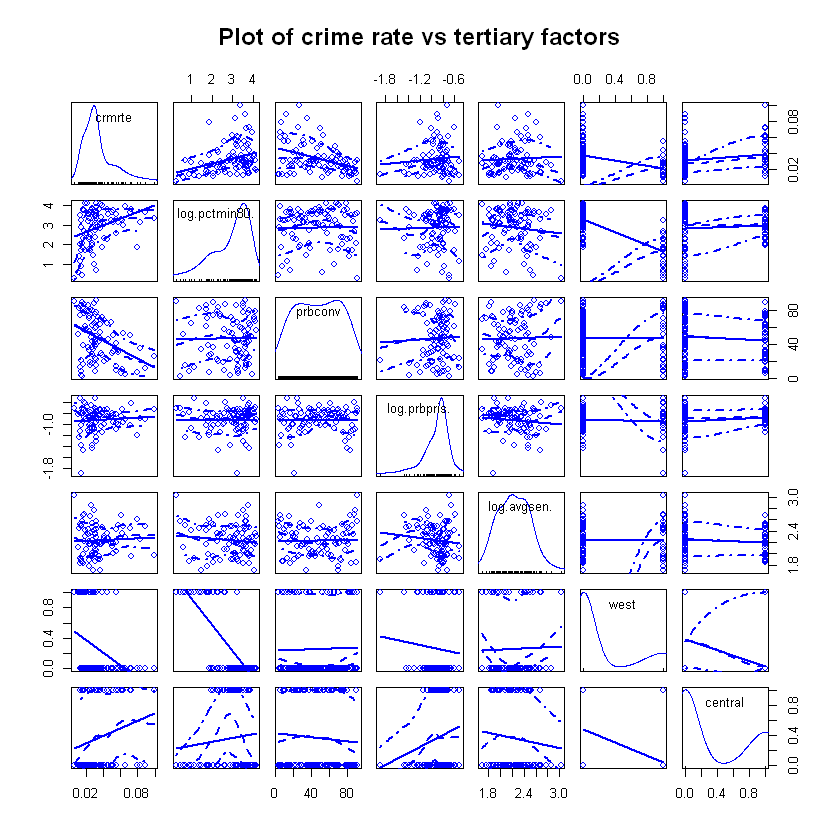

In [135]:
scatterplotMatrix(~crmrte + log(pctmin80) + prbconv^2 + log(prbpris) + log(avgsen) + west + central, data=data,
                   main="Plot of crime rate vs tertiary factors")

In [129]:
correlations <- cor(data)
correlations[order(correlations[,2]),2]

prbarr      prbconv         west          mix       avgsen       county 
-0.407623882 -0.384734631 -0.360758914 -0.145470593  0.007397583  0.030993962 
     prbpris        polpc      central         wsta         wtuc     pctmin80 
 0.052840613  0.164891574  0.190233555  0.206759646  0.218487972  0.226010544 
     pctymle         wfir         wser         wmfg         wloc         wcon 
 0.286121978  0.319846877  0.339343260  0.345555917  0.345631303  0.382047713 
        wtrd        taxpc         wfed        urban      density       crmrte 
 0.399695742  0.457646315  0.478998138  0.616765513  0.727522933  1.000000000

# Conclusion

crime_rate ~ B_1 * wage -> R2 very high; adjusted R2 very high
* wage is positive correlated; density is omitted but also positively correlated
* actual effect of wage is smaller than what B_1 is now, unclear if it's positive or negative
* single_parent - is negatively correlated with wage, positive correlated with crime
      - Actual effect of wage is HIGHER than what B_1 is now
* Conclusion might be - many omitted variables, but we believe that B_1 probably artifiically increased overall 

crime_rate ~ B_1*wage + B_2*density -> R2 very high (even higher); adjusted R2 unclear 
* B_1 DEFINITELY LOWER (unclear if negative or positive)
* B_2 is positive